In [4]:
library(tidyverse)
library(readxl)
library(data.table)
library (ggplot2)
#install.packages("ggpubr")
#library(ggpubr)
#library(clusterProfiler)
#library(org.Hs.eg.db)
#library(biomaRt)

In [6]:
prop_coarse_cells = "/nfs/team205/vk8/scripts/de_lmm_natsuhiko/results_all/DE_human_scell_coarse_v2_2023May_prop_stat.csv"
prop_coarse_nuclei = "/nfs/team205/vk8/scripts/de_lmm_natsuhiko/results_all/DE_human_snuclei_coarse_v2_2023May_prop_stat.csv"
DE_coarse_nuclei = "/nfs/team205/vk8/scripts/de_lmm_natsuhiko/DE_human_snuclei_coarse_v2_2023May/de_celltype_Age_interaction_all.txt"
DE_coarse_cells = "/nfs/team205/vk8/scripts/de_lmm_natsuhiko/DE_human_scell_coarse_v2_2023May/de_celltype_Age_interaction_all.txt"

In [78]:
prop_fine_cells = "/nfs/team205/vk8/scripts/de_lmm_natsuhiko/results_all/DE_human_scell_granular_v2_2023May_prop_stat.csv"
prop_fine_nuclei = "/nfs/team205/vk8/scripts/de_lmm_natsuhiko/results_all/DE_human_snuclei_granular_v2_2023May_prop_stat.csv"
DE_fine_nuclei = "/nfs/team205/vk8/scripts/de_lmm_natsuhiko/DE_human_snuclei_granular_v2_2023May/de_celltype_Age_interaction_all.txt"
DE_fine_cells = "/nfs/team205/vk8/scripts/de_lmm_natsuhiko/DE_human_scell_granular_v2_2023May/de_celltype_Age_interaction_all.txt"

In [5]:
res_path_cells = "/nfs/team205/vk8/scripts/de_lmm_natsuhiko/results_all"

In [33]:
read_and_process = function(input_de_path, input_prop_path){
    de_dt = fread(input_de_path)
    prop_dt = fread(input_prop_path)
    colnames(de_dt)[2] = "SYMBOL"
    de_dt[, log2fc:=beta_old-beta_young]
#    de_dt[, cell_type_common:=celltype]
    de_dt[, sign:=ltsr>0.9]
    de2prop_dt = merge(de_dt, prop_dt, by.x = c("ENSEMBL", "SYMBOL", "celltype"), by.y = c("ENSEMBL", "SYMBOL", "celltype"))
    de2prop_dt[, REGULATION:=case_when((log2fc>0 & ltsr > 0.9) ~ "UP", (log2fc<0 & ltsr > 0.9) ~ "DW",TRUE ~ 'none')]
    return(de2prop_dt)
}

In [34]:
DE_tb_cells = read_and_process(input_de_path = DE_coarse_cells, 
                               input_prop_path = prop_coarse_cells)
DE_tb_nuclei = read_and_process(input_de_path = DE_coarse_nuclei, 
                               input_prop_path = prop_coarse_nuclei)

DE_genes_broad2entrez = rbind(DE_tb_cells, DE_tb_nuclei)

In [79]:
DE_tb_cells_fine = read_and_process(input_de_path = DE_fine_cells, 
                               input_prop_path = prop_fine_cells)
DE_tb_nuclei_fine = read_and_process(input_de_path = DE_fine_nuclei, 
                               input_prop_path = prop_fine_nuclei)

DE_genes_fine = rbind(DE_tb_cells_fine, DE_tb_nuclei_fine)

In [36]:
unique(DE_tb$celltype)

[1] "ArtEC"         "B-cell"        "B-plasma"      "CD14+Mono"    
 [5] "CD16+Mono"     "CD16+NK"       "CD16-NK"       "CD4+T"        
 [9] "CD8+T"         "CapEC"         "EnFB"          "FB"           
[13] "MF-IIsc(fg)"   "MF-Isc(fg)"    "Macrophage"    "Mast"         
[17] "MuSC"          "Neutrophil"    "Pericyte"      "PnFB"         
[21] "SMC"           "Tenocyte"      "VenEC"         "cDC1"         
[25] "cDC2"          "mSchwann"      "nmSchwann"     "Adipocyte"    
[29] "Hyb"           "MF-I"          "MF-II"         "MF-IIsn(fg)"  
[33] "MF-Isn(fg)"    "MTJ"           "NMJ"           "NMJ_accessory"

In [19]:
mito_biogenesis = c('PPARGC1A', 'NRF1', 'CYRIB','GABPA', 'TFAM', 'TFB1M', 'TFB2M', 'VEGFC') # mitochondrial biogenesis
glycolis = c("HK1", "GPI", "PFKM", "ALDOA", "TPI1", "GAPDH", "PGK1", "PGAM2", "ENO3", "PKM")
mito_compI = sort(grep("NDUF", unique(DE_genes_broad2entrez$SYMBOL), value = T))  
mito_compII = c("SDHA", "SDHB", "SDHC", "SDHD")  
mito_compIII = c("UQCR10", "UQCRB", "UQCRC1", "UQCRC2", "UQCRFS1", "UQCRH", "UQCRQ", "BCS1L", "MT-CYB")
mito_compIV = c("COX10", "COX11", "COX14", "COX15", "COX16", "COX17", "COX18", "COX19", "COX20", "COX4I1", "COX4I2",
                 "COX5A", "COX5B", "COX6A1", "COX6A2", "COX6B1", "COX6C", "COX7A1", "COX7A2", "COX7A2L", "COX7B",
                 "COX7C", "COX8A","CYB5A")  
mito_compV = sort(grep("ATP5", unique(DE_genes_broad2entrez$SYMBOL), value = T))

mito_genes = sort(grep("MT-", unique(DE_genes_broad2entrez$SYMBOL), value = T))
glycogenolis = c("AGL", "PYGM", "PHKA1", "PHKB", "EPM2A", "PPP1R3A", "PGM1", "GYG1", "GYS1", "GBE1", "UGP2", "SLC37A4")
    
unique(DE_genes_broad2entrez$celltype)

[1] "ArtEC"         "B-cell"        "B-plasma"      "CD14+Mono"    
 [5] "CD16+Mono"     "CD16+NK"       "CD16-NK"       "CD4+T"        
 [9] "CD8+T"         "CapEC"         "EnFB"          "FB"           
[13] "MF-IIsc(fg)"   "MF-Isc(fg)"    "Macrophage"    "Mast"         
[17] "MuSC"          "Neutrophil"    "Pericyte"      "PnFB"         
[21] "SMC"           "Tenocyte"      "VenEC"         "cDC1"         
[25] "cDC2"          "mSchwann"      "nmSchwann"     "Adipocyte"    
[29] "Hyb"           "MF-I"          "MF-II"         "MF-IIsn(fg)"  
[33] "MF-Isn(fg)"    "MTJ"           "NMJ"           "NMJ_accessory"

In [71]:
myofiber_types = c('MF-I', 'MF-Isn(fg)', 'MF-Isc(fg)', 'MF-II', 'MF-IIsn(fg)', 'MF-IIsc(fg)')

In [72]:
myofiber_types_filt = c('MF-I', 'MF-Isc(fg)', 'MF-II', 'MF-IIsc(fg)')

In [40]:
length(unique(DE_genes_broad2entrez$celltype))

[1] 36

In [38]:
length(c('MF-I', 'MF-Isn(fg)', 'MF-Isc(fg)', 'MF-II', 'MF-IIsn(fg)', 'MF-IIsc(fg)', 'Hyb', 'MTJ', 'NMJ', 'NMJ_accessory',
       'MuSC', 'FB', 'Tenocyte', 'EnFB', 'PnFB', 'mSchwann', 'nmSchwann', 'Adipocyte', 
       'ArtEC', 'CapEC', 'VenEC', 'Pericyte', 'SMC',
       'CD4+T','CD8+T', 'CD16+NK','CD16-NK', 'B-cell','B-plasma', 
       'CD14+Mono', 'CD16+Mono', 'Macrophage', 'cDC1', 'cDC2', 'Mast', 'Neutrophil'
       ))

[1] 36

In [45]:
DE_genes_broad2entrez$REGULATION = factor(DE_genes_broad2entrez$REGULATION, levels = c("none", "UP", "DW"))
DE_genes_broad2entrez$celltype = factor(DE_genes_broad2entrez$celltype, levels = 
      c('MF-I', 'MF-Isn(fg)', 'MF-Isc(fg)', 'MF-II', 'MF-IIsn(fg)', 'MF-IIsc(fg)', 'Hyb', 'MTJ', 'NMJ', 'NMJ_accessory',
       'MuSC', 'FB', 'Tenocyte', 'EnFB', 'PnFB', 'mSchwann', 'nmSchwann', 'Adipocyte', 
       'ArtEC', 'CapEC', 'VenEC', 'Pericyte', 'SMC',
       'CD4+T','CD8+T', 'CD16+NK','CD16-NK', 'B-cell','B-plasma', 
       'CD14+Mono', 'CD16+Mono', 'Macrophage', 'cDC1', 'cDC2', 'Mast', 'Neutrophil'
       ))

# Mictochondrial complex I

Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


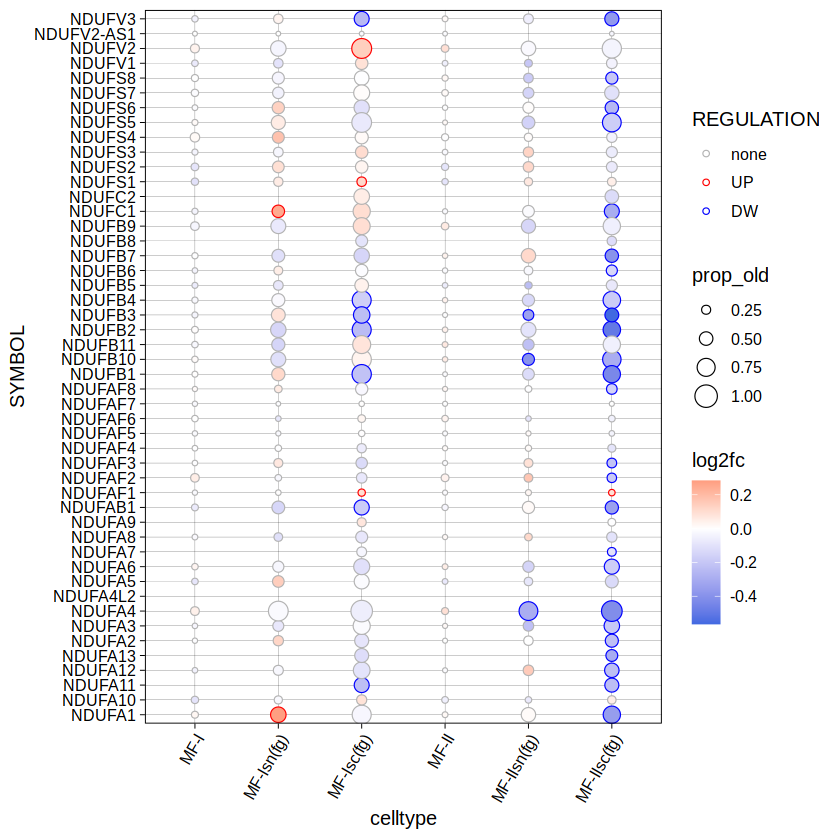

In [46]:
ggplot(DE_genes_broad2entrez[(SYMBOL %in% mito_compI) & (celltype %in% myofiber_types)], 
       aes(x= SYMBOL, y=celltype, size=prop_old, fill=log2fc, color = REGULATION, group = celltype)) + 
  geom_point(pch=21) +
  theme_linedraw(base_size = 12) +
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + 
 # scale_fill_gradientn(colors = rev(brewer.pal(11, "RdBu"))) + 
  scale_fill_gradient2(midpoint = 0, low = "royalblue", mid = "white",
                            high = "red", space = "Lab" ) + 
  scale_color_manual(values = c("gray70", "red", "blue")) + 
  scale_radius(limits = range(0.01, 1)) + coord_flip()

# Mictochondrial complex II

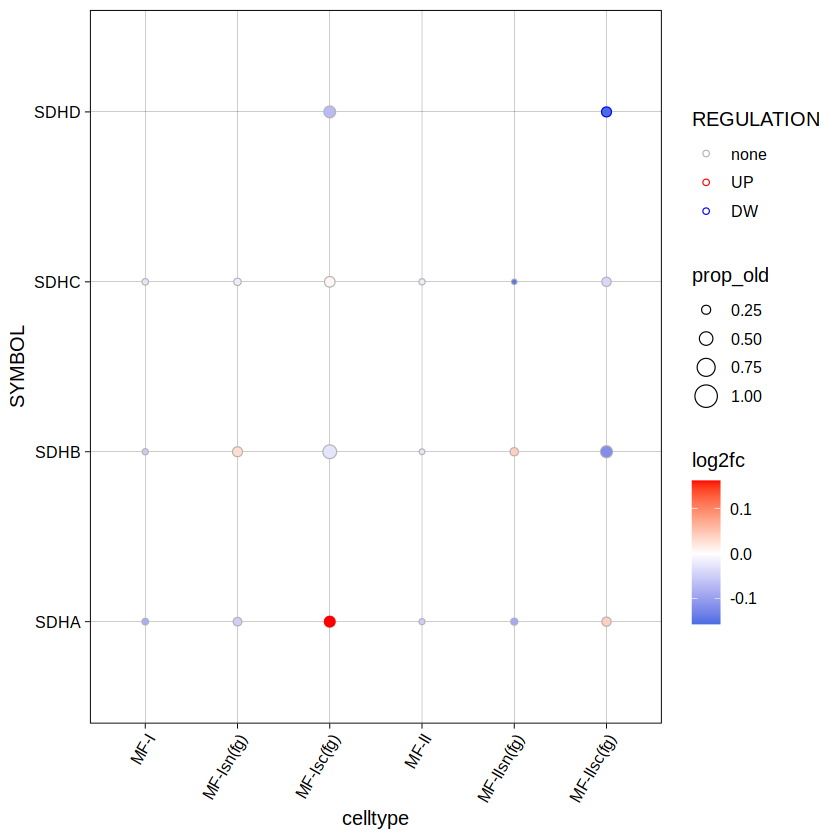

In [47]:
ggplot(DE_genes_broad2entrez[(SYMBOL %in% mito_compII) & (celltype %in% myofiber_types)], 
       aes(x= SYMBOL, y=celltype, size=prop_old, fill=log2fc, color = REGULATION, group = celltype)) + 
  geom_point(pch=21) +
  theme_linedraw(base_size = 12) +
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + 
 # scale_fill_gradientn(colors = rev(brewer.pal(11, "RdBu"))) + 
  scale_fill_gradient2(midpoint = 0, low = "royalblue", mid = "white",
                            high = "red", space = "Lab" ) + 
  scale_color_manual(values = c("gray70", "red", "blue")) + 
  scale_radius(limits = range(0.01, 1)) + coord_flip()

# Mictochondrial complex III

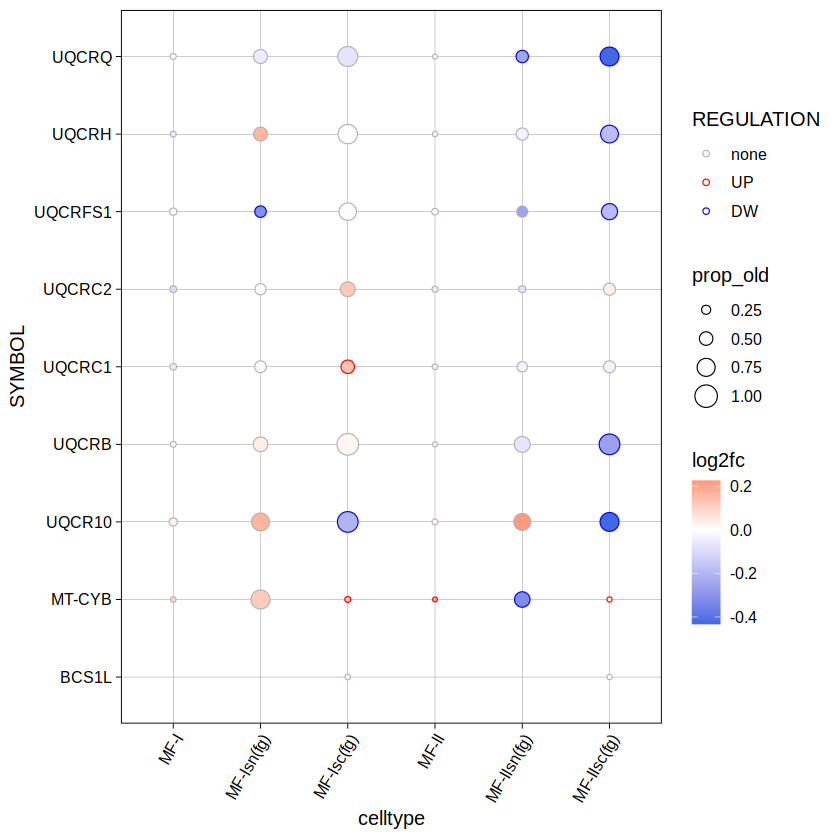

In [48]:
ggplot(DE_genes_broad2entrez[(SYMBOL %in% mito_compIII) & (celltype %in% myofiber_types)], 
       aes(x= SYMBOL, y=celltype, size=prop_old, fill=log2fc, color = REGULATION, group = celltype)) + 
  geom_point(pch=21) +
  theme_linedraw(base_size = 12) +
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + 
 # scale_fill_gradientn(colors = rev(brewer.pal(11, "RdBu"))) + 
  scale_fill_gradient2(midpoint = 0, low = "royalblue", mid = "white",
                            high = "red", space = "Lab" ) + 
  scale_color_manual(values = c("gray70", "red", "blue")) + 
  scale_radius(limits = range(0.01, 1)) + coord_flip()

# Mictochondrial complex IV

Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”


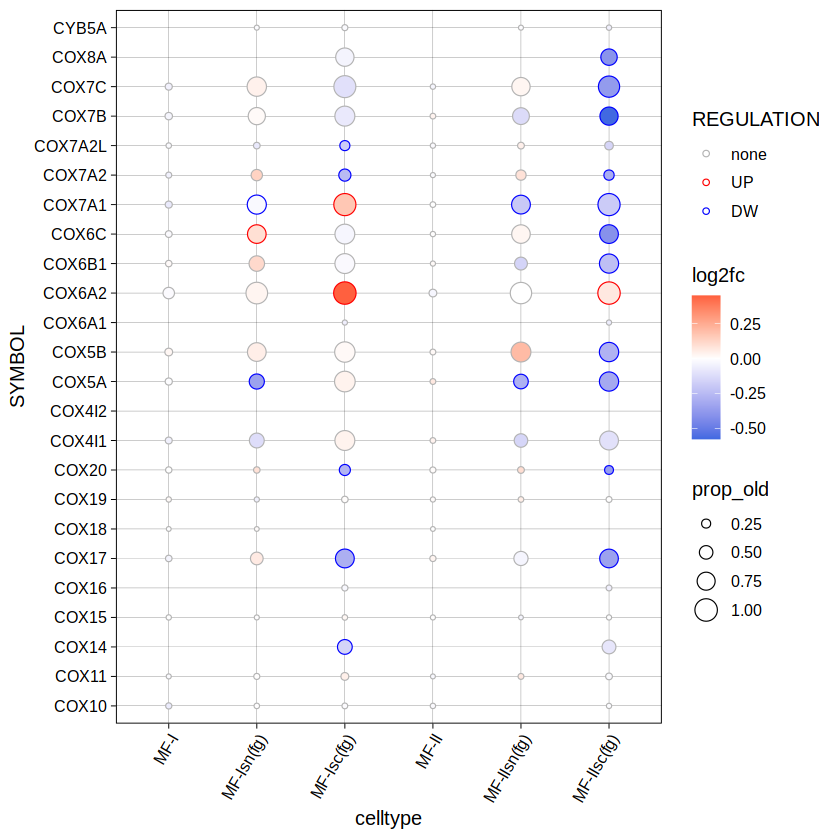

In [49]:
ggplot(DE_genes_broad2entrez[(SYMBOL %in% mito_compIV) & (celltype %in% myofiber_types)], 
       aes(x= SYMBOL, y=celltype, size=prop_old, fill=log2fc, color = REGULATION, group = celltype)) + 
  geom_point(pch=21) +
  theme_linedraw(base_size = 12) +
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + 
 # scale_fill_gradientn(colors = rev(brewer.pal(11, "RdBu"))) + 
  scale_fill_gradient2(midpoint = 0, low = "royalblue", mid = "white",
                            high = "red", space = "Lab" ) + 
  scale_color_manual(values = c("gray70", "red", "blue")) + 
  scale_radius(limits = range(0.01, 1)) + coord_flip()

# Mictochondrial complex V

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


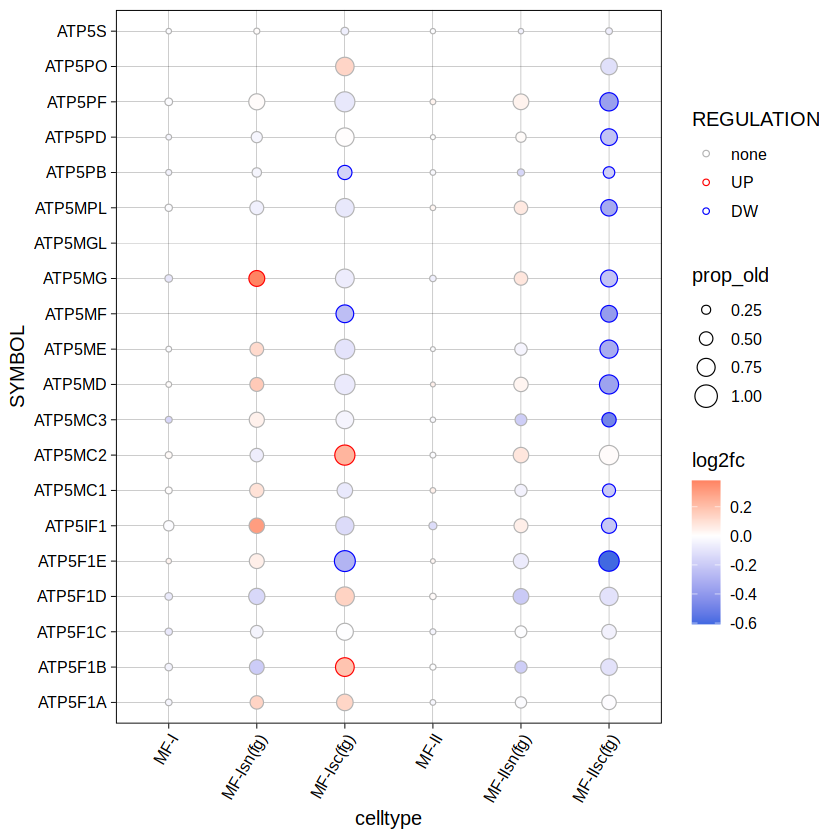

In [50]:
ggplot(DE_genes_broad2entrez[(SYMBOL %in% mito_compV) & (celltype %in% myofiber_types)], 
       aes(x= SYMBOL, y=celltype, size=prop_old, fill=log2fc, color = REGULATION, group = celltype)) + 
  geom_point(pch=21) +
  theme_linedraw(base_size = 12) +
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + 
 # scale_fill_gradientn(colors = rev(brewer.pal(11, "RdBu"))) + 
  scale_fill_gradient2(midpoint = 0, low = "royalblue", mid = "white",
                            high = "red", space = "Lab" ) + 
  scale_color_manual(values = c("gray70", "red", "blue")) + 
  scale_radius(limits = range(0.01, 1)) + coord_flip()

# Mitochondrial genes

Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”


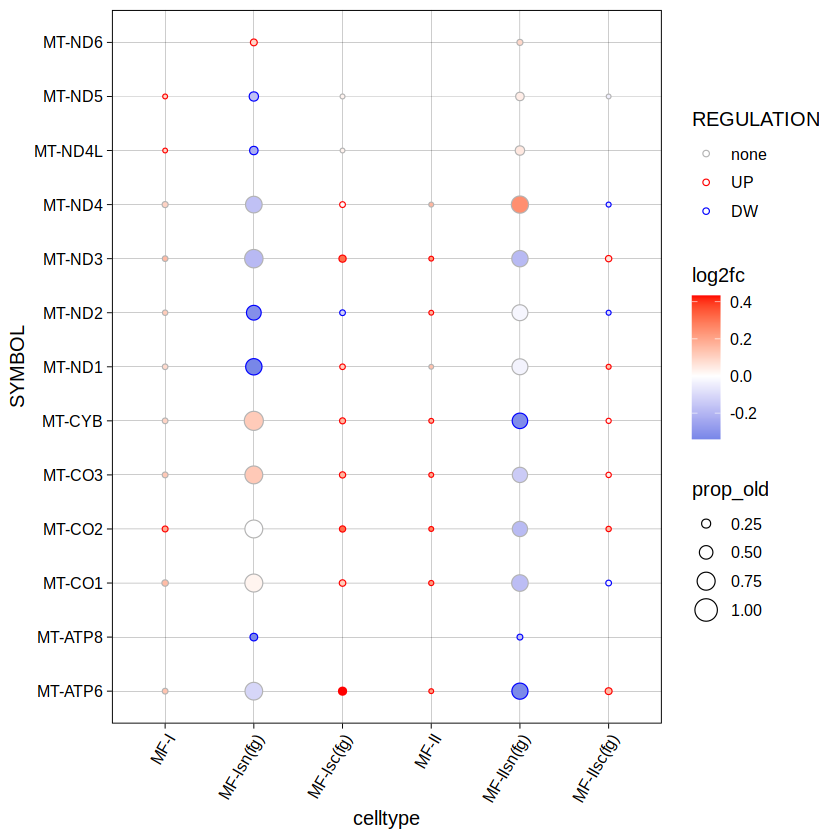

In [51]:
ggplot(DE_genes_broad2entrez[(SYMBOL %in% mito_genes) & (celltype %in% myofiber_types)], 
       aes(x= SYMBOL, y=celltype, size=prop_old, fill=log2fc, color = REGULATION, group = celltype)) + 
  geom_point(pch=21) +
  theme_linedraw(base_size = 12) +
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + 
 # scale_fill_gradientn(colors = rev(brewer.pal(11, "RdBu"))) + 
  scale_fill_gradient2(midpoint = 0, low = "royalblue", mid = "white",
                            high = "red", space = "Lab" ) + 
  scale_color_manual(values = c("gray70", "red", "blue")) + 
 scale_radius(limits = range(0.01, 1)) + coord_flip()
 

In [ ]:
DE_genes_broad2entrez$celltype

# Glycogenolysis genes

In [52]:
glycogenolysis_DE = DE_genes_broad2entrez[(SYMBOL %in% glycogenolis) & (celltype %in% myofiber_types)]
glycogenolysis_DE$SYMBOL = factor(glycogenolysis_DE$SYMBOL, levels = rev(glycogenolis))

In [53]:
p_glycogenolysis = ggplot(glycogenolysis_DE, aes(x= SYMBOL, y=celltype, size=prop_old, fill=log2fc, color = REGULATION, group = celltype)) + 
  geom_point(pch=21) +
  theme_linedraw(base_size = 12) +
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + 
 # scale_fill_gradientn(colors = rev(brewer.pal(11, "RdBu"))) + 
  scale_fill_gradient2(midpoint = 0, low = "royalblue", mid = "white",
                            high = "red", space = "Lab" ) + 
  scale_color_manual(values = c("gray70", "red", "blue")) + 
  scale_radius(limits = range(0.01, 1)) + coord_flip()

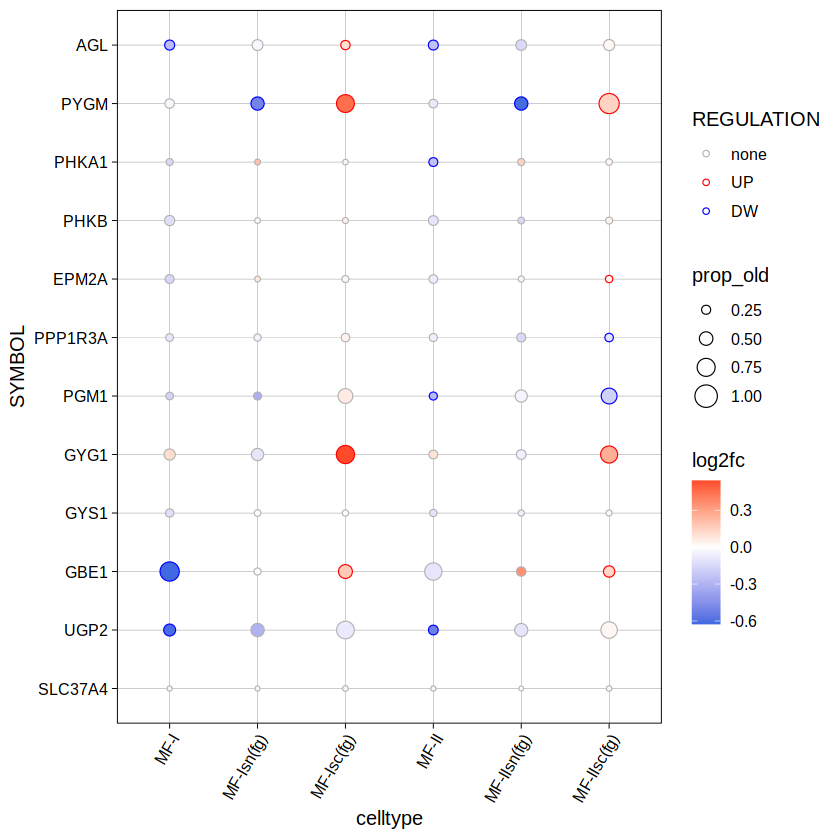

In [54]:
p_glycogenolysis
ggsave(filename = "/mnt/muscle_ageing/figures/DE_glycogenolysis_mf_broad.pdf", plot = p_glycogenolysis, width = 5, height = 4.5, dpi = 300, u

In [125]:
mito_biogenesis

[1] "PPARGC1A" "NRF1"     "CYRIB"    "GABPA"    "TFAM"     "TFB1M"    "TFB2M"   
[8] "VEGFC"

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


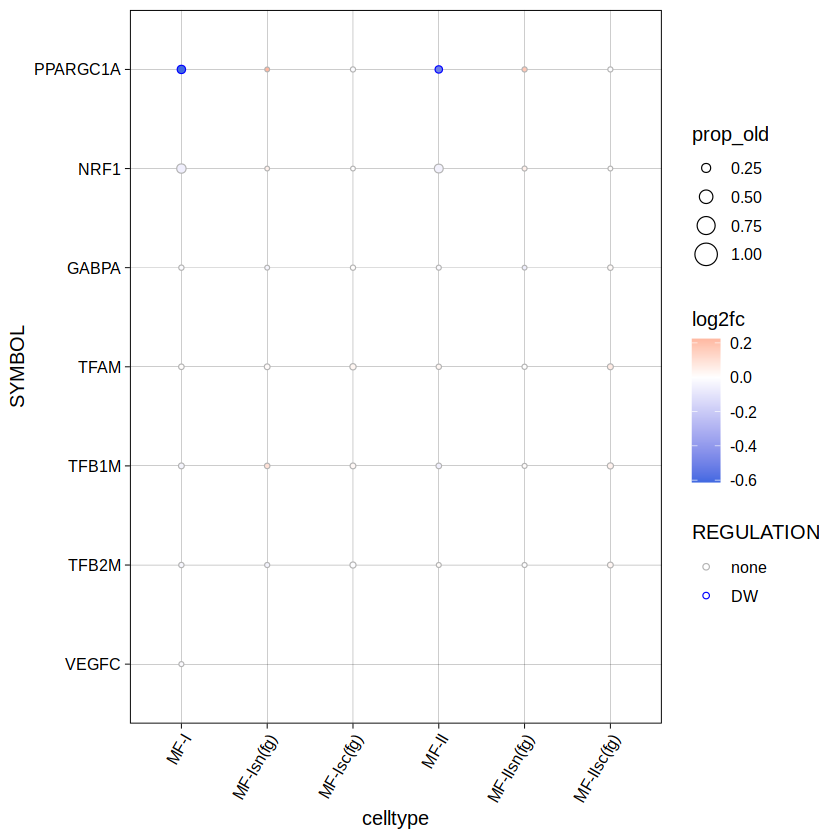

In [56]:
mito_biog_DE = DE_genes_broad2entrez[(SYMBOL %in% mito_biogenesis) & (celltype %in% myofiber_types)]
mito_biog_DE$SYMBOL = factor(mito_biog_DE$SYMBOL, levels = rev(mito_biogenesis))

p_mito_biog = ggplot(mito_biog_DE, aes(x= SYMBOL, y=celltype, size=prop_old, fill=log2fc, color = REGULATION, group = celltype)) + 
  geom_point(pch=21) +
  theme_linedraw(base_size = 12) +
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + 
 # scale_fill_gradientn(colors = rev(brewer.pal(11, "RdBu"))) + 
  scale_fill_gradient2(midpoint = 0, low = "royalblue", mid = "white",
                            high = "red", space = "Lab" ) + 
  scale_color_manual(values = c("gray70", "blue")) + 
  scale_radius(limits = range(0.01, 1)) + coord_flip()

p_mito_biog
#ggsave(filename = "/mnt/muscle_ageing/figures/DE_mitobiog_mf_broad.pdf", plot = p_mito_biog, width = 5, height =5, dpi = 300, useDingbats = FALSE)

In [62]:
DE_genes_broad2entrez[DE_genes_broad2entrez$SYMBOL == 'ALDOA',]

ENSEMBL,SYMBOL,celltype,ltsr,beta_old,beta_young,flag5,log2fc,sign,prop_young,prop_old,n_cells_young,n_cells_old,REGULATION,celltypes
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>
ENSG00000149925,ALDOA,ArtEC,1.466561e-05,0.0006837459,-0.006840372,TRUE,0.0075241177,FALSE,0.13782447,0.14674556,1618,845,none,NA
ENSG00000149925,ALDOA,B-cell,1.236178e-03,-0.0626345694,0.052720648,TRUE,-0.1153552179,FALSE,0.08450704,0.05449331,213,1046,none,NA
ENSG00000149925,ALDOA,B-plasma,1.996793e-05,-0.0325213451,0.025234078,TRUE,-0.0577554228,FALSE,0.27272727,0.13173653,22,167,none,NA
ENSG00000149925,ALDOA,CD14+Mono,1.974985e-01,-0.0645052648,0.063701298,TRUE,-0.1282065631,FALSE,0.23097113,0.19430315,1143,983,none,NA
ENSG00000149925,ALDOA,CD16+Mono,1.328034e-05,0.0036087316,-0.002524308,TRUE,0.0061330394,FALSE,0.24338624,0.33333333,189,255,none,NA
ENSG00000149925,ALDOA,CD16+NK,2.986895e-05,0.0189948743,-0.026083050,TRUE,0.0450779243,FALSE,0.03142857,0.09284404,350,2725,none,NA
ENSG00000149925,ALDOA,CD16-NK,1.991557e-05,-0.0220655425,0.011939097,TRUE,-0.0340046399,FALSE,0.04081633,0.05755396,49,417,none,NA
ENSG00000149925,ALDOA,CD4+T,2.122047e-05,0.0110933788,-0.015187315,TRUE,0.0262806938,FALSE,0.06359300,0.12207988,629,2654,none,NA
ENSG00000149925,ALDOA,CD8+T,7.610932e-06,-0.0188855803,0.011810455,TRUE,-0.0306960354,FALSE,0.06345733,0.07614458,457,2075,none,NA


In [59]:
glycolysis_DE[glycolysis_DE$SYMBOL == 'ALDOA']

ENSEMBL,SYMBOL,celltype,ltsr,beta_old,beta_young,flag5,log2fc,sign,prop_young,prop_old,n_cells_young,n_cells_old,REGULATION,celltypes
<chr>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>
ENSG00000149925,ALDOA,MF-IIsc(fg),0.9999973,-0.02505437,0.09957638,TRUE,-0.1246308,TRUE,0.7831216,0.7170601,1102,5973,DW,NA
ENSG00000149925,ALDOA,MF-Isc(fg),1.0000000,0.12576005,-0.08906570,TRUE,0.2148258,TRUE,0.4703059,0.5794234,1667,3538,UP,NA


Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


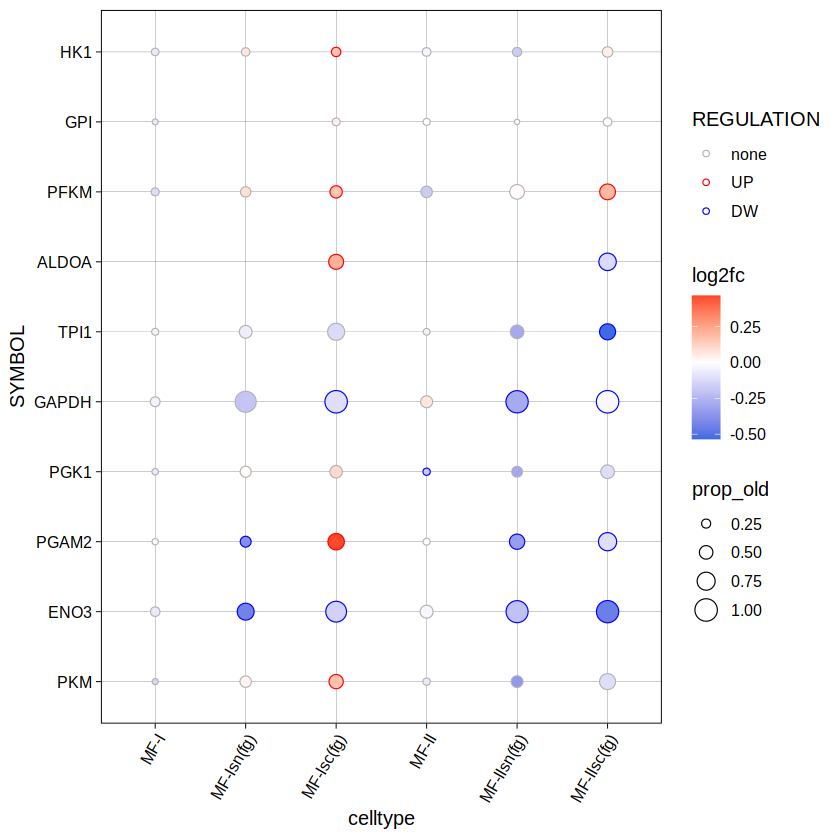

In [57]:
glycolysis_DE = DE_genes_broad2entrez[(SYMBOL %in% glycolis) & (celltype %in% myofiber_types)]
glycolysis_DE$SYMBOL = factor(glycolysis_DE$SYMBOL, levels = rev(glycolis))


p_glycolis = ggplot(glycolysis_DE, aes(x= SYMBOL, y=celltype, size=prop_old, fill=log2fc, color = REGULATION, group = celltype)) + 
  geom_point(pch=21) +
  theme_linedraw(base_size = 12) +
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + 
 # scale_fill_gradientn(colors = rev(brewer.pal(11, "RdBu"))) + 
  scale_fill_gradient2(midpoint = 0, low = "royalblue", mid = "white",
                            high = "red", space = "Lab" ) + 
  scale_color_manual(values = c("gray70", "red", "blue")) + 
  scale_radius(limits = range(0.01, 1)) + coord_flip()
p_glycolis
#ggsave(filename = "/mnt/muscle_ageing/figures/DE_glycolysis_mf_broad.pdf", plot = p_glycolis, width = 5, height = 4.5, dpi = 300, useDingbats = FALSE)
#S1<- ggplot(gene_subset, aes(x= SYMBOL, y=ctype2species, size=ltsr, colour=log2fc, group = ctype2species)) + geom_point(alpha = 0.8) + theme_pubr() +scale_colour_gradientn(colors = rev(brewer.pal(9, "RdBu"))) +scale_size(breaks = c(0, 0.5, 0.9, 0.95, 0.99)) + 

In [126]:
mito_biogenesis

[1] "PPARGC1A" "NRF1"     "CYRIB"    "GABPA"    "TFAM"     "TFB1M"    "TFB2M"   
[8] "VEGFC"

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


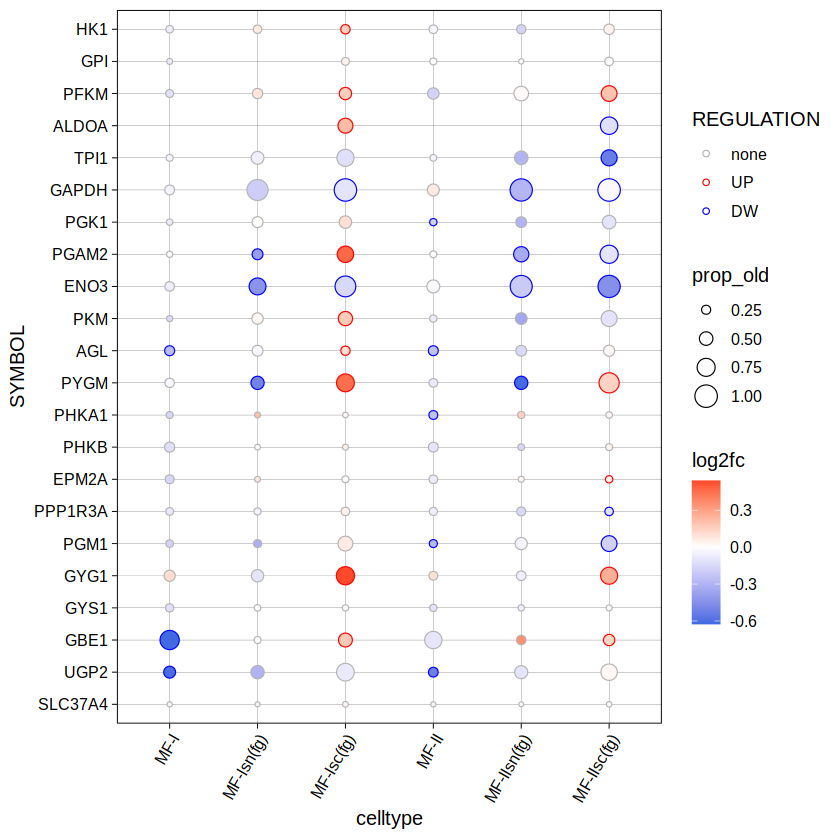

In [68]:
gluc_DE = DE_genes_broad2entrez[(SYMBOL %in% c(glycolis, glycogenolis)) & (celltype %in% myofiber_types)]
gluc_DE$SYMBOL = factor(gluc_DE$SYMBOL, levels = c(rev(glycogenolis), rev(glycolis)))

#gluc_DE$celltype = factor(gluc_DE$celltype, c("MF_typeII(fg)", "MF_typeII(cytoplasmic)", "MF_typeII", "MF_typeI(fg)", "MF_typeI(cytoplasmic)", "MF_typeI"))

p_gluc = ggplot(gluc_DE, aes(x= SYMBOL, y=celltype, size=prop_old, fill=log2fc, color = REGULATION, group = celltype)) + 
  geom_point(pch=21) +
  theme_linedraw(base_size = 12) +
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + 
 # scale_fill_gradientn(colors = rev(brewer.pal(11, "RdBu"))) + 
  scale_fill_gradient2(midpoint = 0, low = "royalblue", mid = "white",
                            high = "red", space = "Lab" ) + 
  scale_color_manual(values = c("gray70", "red", "blue")) + 
  scale_radius(limits = range(0.01, 1)) + coord_flip()
p_gluc
#ggsave(filename = "/mnt/muscle_ageing/figures/DE_gluc_mf_broad.pdf", plot = p_gluc, width = 8.0, height = 3.5, dpi = 300, useDingbats = FALSE)  

In [69]:
myofiber_types_filt

[1] "MF-I"        "MF-Isn(fg)"  "MF-Isc(fg)"  "MF-II"       "MF-IIsn(fg)"
[6] "MF-IIsc(fg)"

In [135]:
gluc_DE = DE_genes_broad2entrez[(SYMBOL %in% c(glycolis, glycogenolis, 'PPARGC1A')) & (celltype %in% myofiber_types_filt)]
#gluc_DE$SYMBOL = factor(gluc_DE$SYMBOL, levels = c(rev(glycogenolis), rev(glycolis)))
gluc_DE$SYMBOL = factor(gluc_DE$SYMBOL, levels = c(glycolis, glycogenolis, "PPARGC1A"))
gluc_DE$celltype = factor(gluc_DE$celltype, c( 'MF-II','MF-IIsc(fg)', 'MF-I', 'MF-Isc(fg)'))

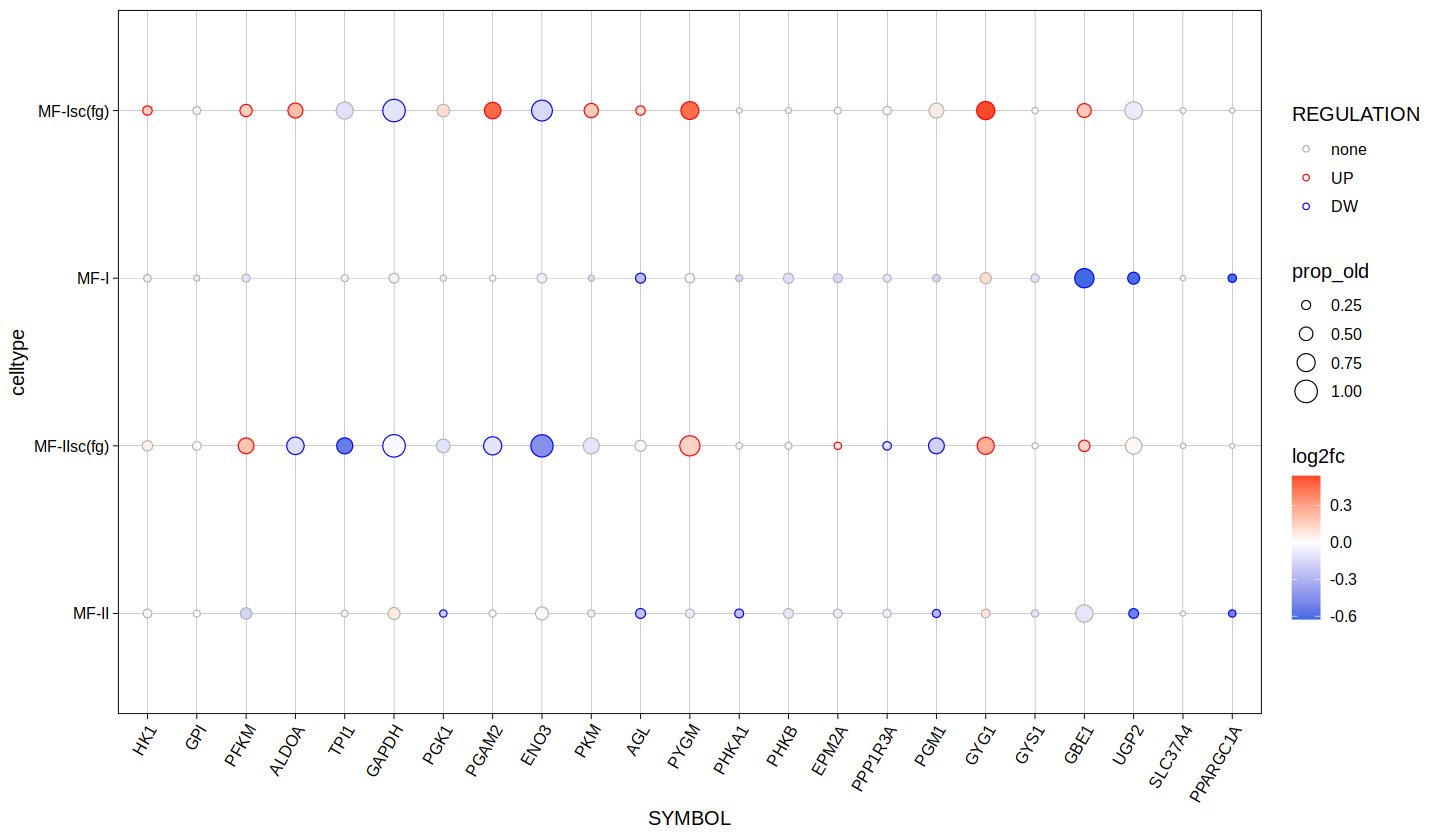

In [136]:
p_gluc = ggplot(gluc_DE, aes(x= SYMBOL, y=celltype, size=prop_old, fill=log2fc, color = REGULATION, 
                             group = celltype)) + 
  geom_point(pch=21) +
  theme_linedraw(base_size = 12) +
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + 
 # scale_fill_gradientn(colors = rev(brewer.pal(11, "RdBu"))) + 
  scale_fill_gradient2(midpoint = 0, low = "royalblue", mid = "white",
                            high = "red", space = "Lab" ) + 
  scale_color_manual(values = c("gray70", "red", "blue")) + 
  scale_radius(limits = range(0.01, 1))
p_gluc
ggsave(filename = "/nfs/team205/vk8/scripts/scvi/SKM_analyses_rev1/figures/DE_gluc_mf_broad.pdf", plot = p_gluc, width = 6, height = 3, dpi = 300, useDingbats = FALSE)  

In [80]:
DE_cells_fine

ERROR: Error in eval(expr, envir, enclos): object 'DE_cells_fine' not found


In [107]:
#DE_genes2entrez = copy(DE_genes_gran2entrez)
cytokine_list = c('CCL2', 'TNFAIP3', 'NFKBIZ', 'CCL3', 'CCL4', 'CXCL8', 'IL6', 'IL10')

#gene_list_filt = c('CCL2', 'CXCL3', 'CCL17', 'IL1A', 'IL1B', 'IL6', 'IL10', 'NLRP3', 'IGF1', 'RRAS', 'SOCS3')
#gene_list_filt = unique(c(gene_list_filt, up_both_strong))

ctypes = c('MuSCs', 'MYOG+MuSCs', 'ICAM1+MuSCs', 'TNFRSF12A+MuSCs', 'B_naive', 'B_memory', "B-plasma", 'Cyc_Plasma','CD16-NK', 'CD16+NK', 'Cyc-NK', 
           "CD4+CD8+T-naive", 'CD4+T', 'CD4+Treg','CD8+T', 'CD8+T-CRTAM+','Cyc-T', 
           'CD14+Mono', 'CD16+Mono', 'Cyc-CD14+Mono', 'Mϕ_CD16hi', 'Mϕ_HLAIIhi', 'Mϕ-LAM', 
           'cDC1', 'cDC2', 'Cyc-cDC2', 'pDC', 'Eosinophil', 'Mast_cell', 'Adv_FB', 'Inter_FB',
           'Par_FB', 'Myo_FB', 'Tenocyte', 'Perineural_FB', 'Endoneural_FB-CDH19+', 'Endoneural_FB-TAC1+', 
           'mSchwann_cell', 'nmSchwann_cell',
           'Artery','Arteriole', 'Cap', 'Cap-CCL2+', 'Cap-Ven','Vein','Vein-CCL2+','Lymphatic',
           'SMC', 'SMC-RAMP1+', 'SMC-CCL2+','SMC-PC', 'Pericyte', 'Pericyte-CCL2+', 'mural-CXCL1+', 'Pericyte-CCL26+')

for (i in ctypes){
  if (!(i %in% unique(DE_tb_cells_fine$celltype))){
    print (i)
  }
}

[1] "pDC"
[1] "Myo_FB"
[1] "Lymphatic"


In [87]:
library(repr)
options(repr.plot.width = 12, height = 4)

In [103]:
muscs = c('MuSCs', 'MYOG+MuSCs', 'ICAM1+MuSCs', 'TNFRSF12A+MuSCs')

In [102]:
unique(DE_tb_cells_fine$celltype)

[1] "Adv_FB"               "Arteriole"            "Arteriole-CCL2+"     
 [4] "Artery"               "B-plasma"             "B_memory"            
 [7] "B_naive"              "CD14+Mono"            "CD16+Mono"           
[10] "CD16+NK"              "CD16-NK"              "CD4+CD8+T-naive"     
[13] "CD4+T"                "CD4+Treg"             "CD8+T"               
[16] "CD8+T-CRTAM+"         "Cap"                  "Cap-CCL2+"           
[19] "Cap-Ven"              "Cyc-CD14+Mono"        "Cyc-NK"              
[22] "Cyc-T"                "Cyc-cDC2"             "Cyc_Plasma"          
[25] "Endoneural_FB-CDH19+" "Endoneural_FB-TAC1+"  "Eosinophil"          
[28] "ICAM1+MuSCs"          "Inter_FB"             "MF_type-MYH8+"       
[31] "MF_type-RASA4+"       "MF_typeI(fg)"         "MF_typeI-TNNT2(fg)"  
[34] "MF_typeI-UCHL1(fg)"   "MF_typeII(fg)"        "MF_typeII-UCHL1(fg)" 
[37] "MYOG+MuSCs"           "Mast_cell"            "MatNeu"              
[40] "Mesothelium"          "MuSCs"                "Mϕ-LAM"              
[43] "Mϕ_CD16hi"            "Mϕ_HLAIIhi"           "Par_FB"              
[46] "Pericyte"             "Pericyte-CCL2+"       "Pericyte-CCL26+"     
[49] "Perineural_FB"        "PreNeu"               "ProNeu"              
[52] "SMC"                  "SMC-CCL2+"            "SMC-PC"              
[55] "SMC-RAMP1+"           "TNFRSF12A+MuSCs"      "Tenocyte"            
[58] "Vein"                 "Vein-CCL2+"           "Vein-Lymph-CD8A+"    
[61] "cDC1"                 "cDC2"                 "mSchwann_cell"       
[64] "mural-CXCL1+"         "nmSchwann_cell"

In [114]:
musc_genes = c('POLR1A', 'POLR1B', 'POLR1C', 'POLR1D', 'RPA3', 'POLR1E', 
             'WDR74', 'WDR3', 'MRTO4', 'EBNA1BP2', 'RPS1', 'RPR9', 'BRIX1', 'IMP4', 
             'UTP3', 'NOP56', 'NOP58', 'DCAF13', 'NOB1', 'MPHOSPH10', 'GAR1', 'DDX21', 
             'NIP7', 'SURF6', 'SNRPB')# 'CCL2', 'TNFAIP3', 'NFKBIZ')

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


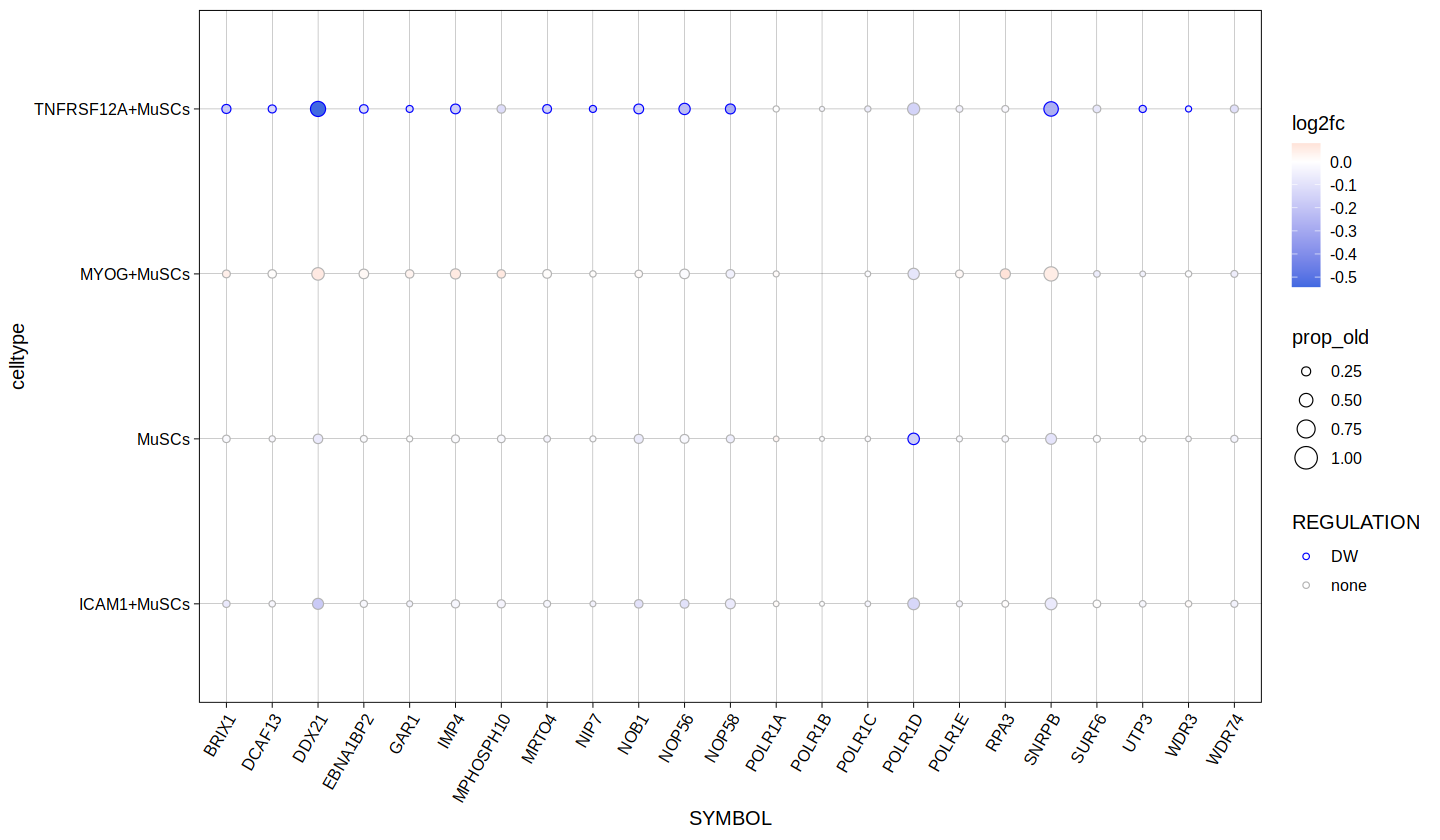

In [116]:
de_musc = ggplot(DE_tb_cells_fine[(SYMBOL %in% musc_genes) & (celltype %in% muscs)], 
                 aes(x= SYMBOL, y=celltype, size=prop_old, fill=log2fc, color = REGULATION, group = celltype)) + 
  geom_point(pch=21) +
  theme_linedraw(base_size = 12) +
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + 
 # scale_fill_gradientn(colors = rev(brewer.pal(11, "RdBu"))) + 
  scale_fill_gradient2(midpoint = 0, low = "royalblue", mid = "white",
                            high = "red", space = "Lab" ) + 
  scale_color_manual(values = c("blue", "gray70")) + 
  scale_radius(limits = range(0.01, 1))

de_musc


Warning message:
“Removed 94 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 91 rows containing missing values (`geom_point()`).”


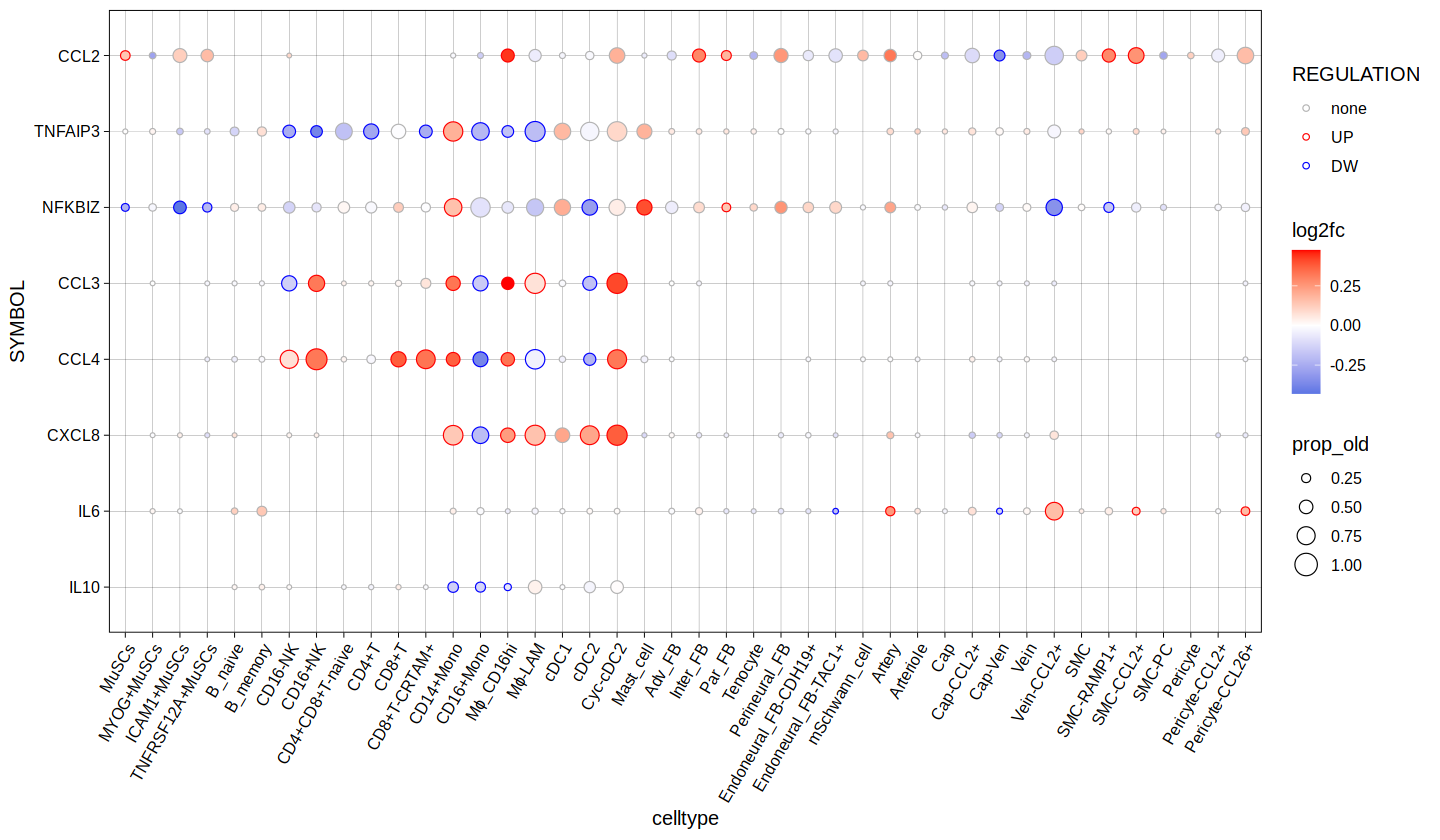

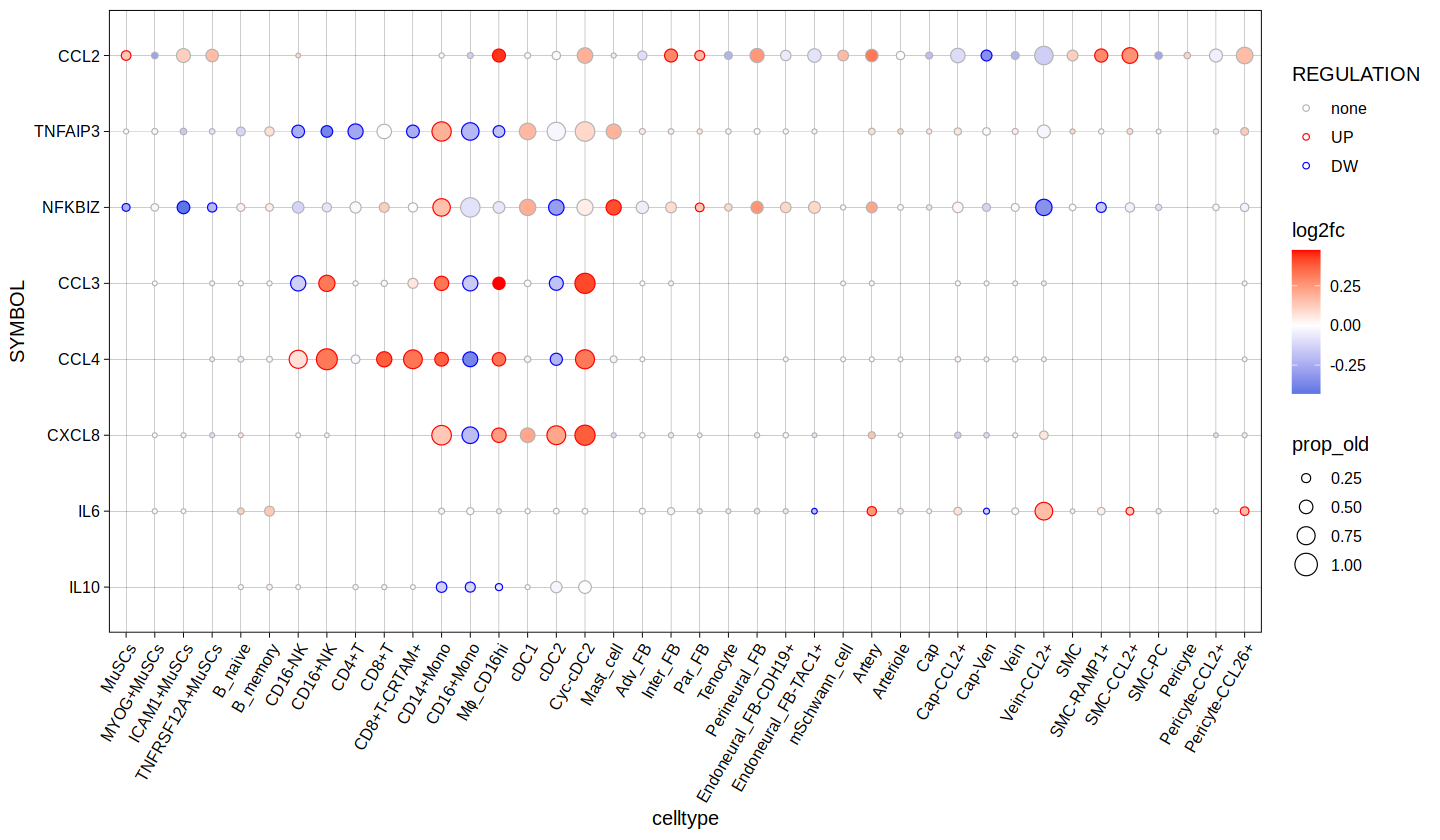

In [108]:
cyt_gene_subset =DE_tb_cells_fine[(SYMBOL %in% cytokine_list) & (celltype %in% ctypes) &
                                 (n_cells_young>30) & (n_cells_old>30)]
cyt_gene_subset$celltype= factor(cyt_gene_subset$celltype, levels = ctypes)
cyt_gene_subset$SYMBOL = factor(cyt_gene_subset$SYMBOL, levels = rev(cytokine_list))
cyt_gene_subset$REGULATION = factor(cyt_gene_subset$REGULATION, levels = c("none", "UP", "DW"))

ctypes_filt = c('MuSCs', 'MYOG+MuSCs', 'ICAM1+MuSCs', 'TNFRSF12A+MuSCs', 'B_naive', 'B_memory',"B-plasma", 'CD16-NK', 'CD16+NK', 'CD4+T-naive', 'CD4+T', 
                'CD8+T', 'CD8+T-CRTAM+', 'CD14+Mono', 'CD16+Mono', 
                'Mϕ_CD16hi', 'cDC1', 'cDC2', 'Cyc-cDC2','Mast_cell', 'Adv_FB', 
                'Inter_FB', 'Par_FB', 'Myo_FB', 'Tenocyte', 'Perineural_FB', 
                'Endoneural_FB-CDH19+', 'Endoneural_FB-TAC1+', 'mSchwann_cell', 'nmSchwann_cell', 
                'Artery','Arteriole', 'Arteriole-CCL2+', 'Cap', 'Cap-CCL2+', 'Cap-Ven','Vein', 'Vein-CCL2+', 'Lymphatic','SMC', 'SMC-RAMP1+', 'SMC-CCL2+','SMC-PC', 'Pericyte', 'Pericyte-CCL2+','Pericyte-CCL26+')


de_allctypes = ggplot(cyt_gene_subset, aes(x= SYMBOL, y=celltype, size=prop_old, fill=log2fc, color = REGULATION, group = celltype)) + 
  geom_point(pch=21) +
  theme_linedraw(base_size = 12) +
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + 
 # scale_fill_gradientn(colors = rev(brewer.pal(11, "RdBu"))) + 
  scale_fill_gradient2(midpoint = 0, low = "royalblue", mid = "white",
                            high = "red", space = "Lab" ) + 
  scale_color_manual(values = c("gray70", "red", "blue")) + 
  scale_radius(limits = range(0.01, 1)) + coord_flip()

de_allctypes

de_sel_ctypes = ggplot(cyt_gene_subset[celltype %in% ctypes_filt,], aes(x= SYMBOL, y=celltype, size=prop_old, fill=log2fc, color = REGULATION, group = celltype)) + 
  geom_point(pch=21) +
  theme_linedraw(base_size = 12) +
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + 
 # scale_fill_gradientn(colors = rev(brewer.pal(11, "RdBu"))) + 
  scale_fill_gradient2(midpoint = 0, low = "royalblue", mid = "white",
                            high = "red", space = "Lab" ) + 
  scale_color_manual(values = c("gray70", "red", "blue")) + 
  scale_radius(limits = range(0.01, 1)) + coord_flip()


de_sel_ctypes
#ggsave(filename = "/mnt/muscle_ageing/figures/DE_chemo_cyto_SKM_stroma.pdf", plot = de_sel_ctypes, width = 9, height = 3, dpi = 300, useDingbats = FALSE)
#S1<- ggplot(cyt_gene_subset, aes(x= SYMBOL, y=ctype2species, size=ltsr, colour=log2fc, group = ctype2species)) + geom_point(alpha = 0.8) + theme_pubr() +scale_colour_gradientn(colors = rev(brewer.pal(9, "RdBu"))) +scale_size(breaks = c(0, 0.5, 0.9, 0.95, 0.99)) + 

In [ ]:
DE_tb_cells$cell

In [95]:
stroma = c('B-cell','B-plasma', 'CD16-NK', 'CD16+NK', 'CD4+T','CD8+T','CD14+Mono', 'CD16+Mono','Macrophage',
           'cDC1', 'cDC2', 'Mast', 'MuSC', 'Adipocyte', 'FB', 'Tenocyte', 'PnFB', 'EnFB', 
           'mSchwann', 'nmSchwann','ArtEC', 'CapEC', 'VenEC', 'SMC','Pericyte')

Warning message:
“Removed 46 rows containing missing values (`geom_point()`).”


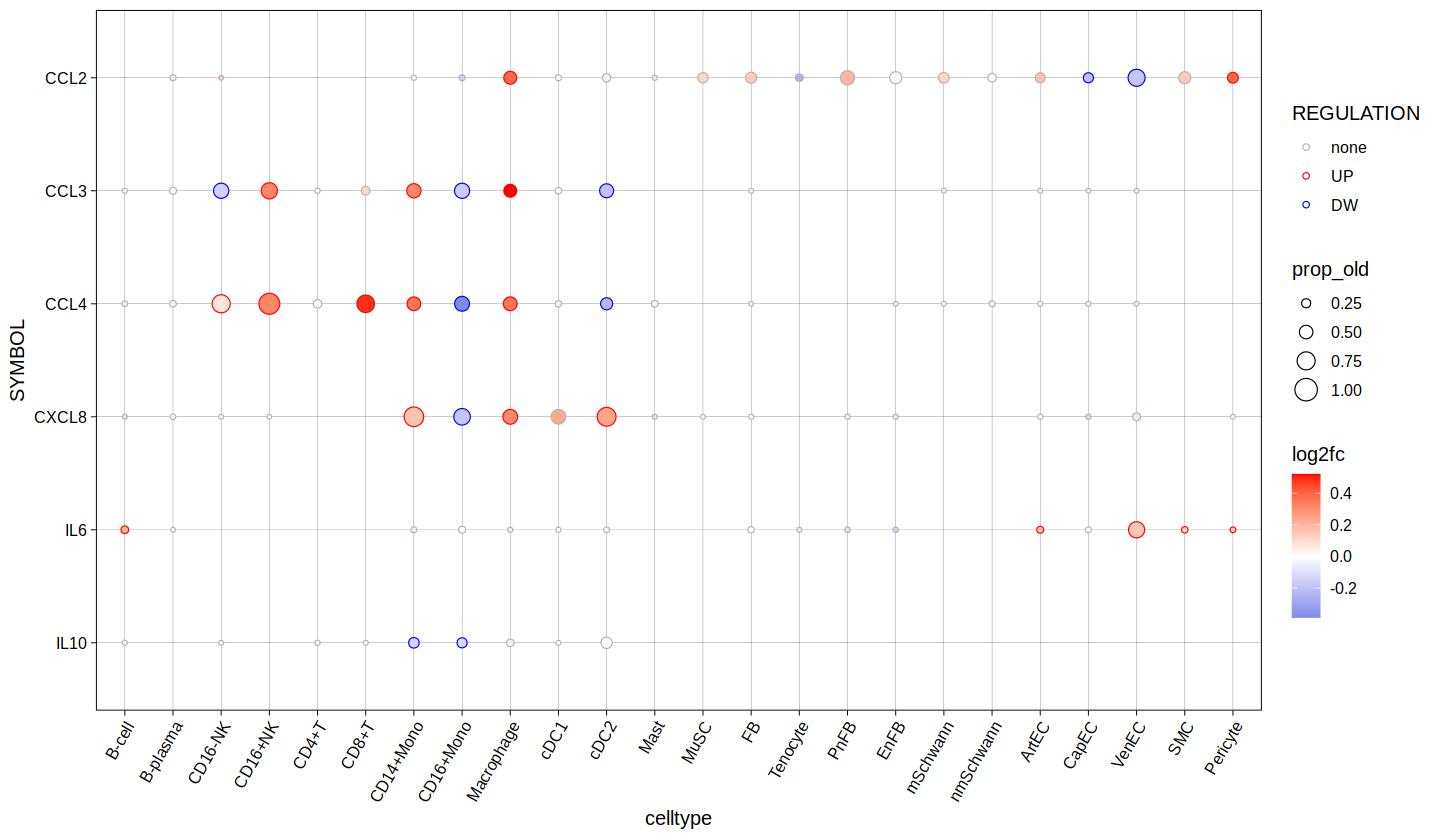

In [96]:
cyt_gene_subset = DE_tb_cells[(SYMBOL %in% cytokine_list) & (celltype %in% stroma)]
cyt_gene_subset$celltype= factor(cyt_gene_subset$celltype, levels = stroma)
cyt_gene_subset$SYMBOL = factor(cyt_gene_subset$SYMBOL, levels = rev(cytokine_list))
cyt_gene_subset$REGULATION = factor(cyt_gene_subset$REGULATION, levels = c("none", "UP", "DW"))

#ctypes_filt = c('B_naive', 'B_memory',"B-plasma", 'CD16-NK', 'CD16+NK', 'CD4+T-naive', 'CD4+T', 'CD8+T', 'CD8+T-CRTAM+', 'CD14+Mono', 'CD16+Mono', 'Mϕ_CD16hi', 'cDC1', 'cDC2', 'Cyc-cDC2','Mast_cell', 'Adv_FB', 'Inter_FB', 'Par_FB', 'Myo_FB', 'Tenocyte', 'Perineural_FB', 'Endoneural_FB-CDH19+', 'Endoneural_FB-TAC1+', 'mSchwann_cell', 'nmSchwann_cell', 'Artery','Arteriole', 'Arteriole-CCL2+', 'Cap', 'Cap-CCL2+', 'Cap-Ven','Vein', 'Vein-CCL2+', 'Lymphatic','SMC', 'SMC-RAMP1+', 'SMC-CCL2+','SMC-PC', 'Pericyte', 'Pericyte-CCL2+','Pericyte-CCL26+')


de_allctypes_level1 = ggplot(cyt_gene_subset, aes(x= SYMBOL, y=celltype, size=prop_old, fill=log2fc, color = REGULATION, group = celltype)) + 
  geom_point(pch=21) +
  theme_linedraw(base_size = 12) +
  theme(axis.text.x = element_text(angle = 60, hjust=1)) + 
 # scale_fill_gradientn(colors = rev(brewer.pal(11, "RdBu"))) + 
  scale_fill_gradient2(midpoint = 0, low = "royalblue", mid = "white",
                            high = "red", space = "Lab" ) + 
  scale_color_manual(values = c("gray70", "red", "blue")) + 
  scale_radius(limits = range(0.01, 1)) + coord_flip()

de_allctypes_level1

#ggsave(filename = "/mnt/muscle_ageing/figures/DE_chemo_cyto_SKM_stroma.pdf", plot = de_sel_ctypes, width = 9, height = 3, dpi = 300, useDingbats = FALSE)
#S1<- ggplot(cyt_gene_subset, aes(x= SYMBOL, y=ctype2species, size=ltsr, colour=log2fc, group = ctype2species)) + geom_point(alpha = 0.8) + theme_pubr() +scale_colour_gradientn(colors = rev(brewer.pal(9, "RdBu"))) +scale_size(breaks = c(0, 0.5, 0.9, 0.95, 0.99)) + 

In [120]:
remotes::install_github("Teichlab/sctkr")

Rcpp        (1.0.9  -> 1.0.10   ) [CRAN]
utf8        (1.2.2  -> 1.2.3    ) [CRAN]
vctrs       (0.5.1  -> 0.6.2    ) [CRAN]
pillar      (1.8.1  -> 1.9.0    ) [CRAN]
tibble      (3.1.8  -> 3.2.1    ) [CRAN]
fansi       (1.0.3  -> 1.0.4    ) [CRAN]
diffobj     (NA     -> 0.3.5    ) [CRAN]
fs          (1.5.2  -> 1.6.2    ) [CRAN]
rprojroot   (NA     -> 2.0.3    ) [CRAN]
waldo       (NA     -> 0.5.1    ) [CRAN]
rlang       (1.0.6  -> 1.1.1    ) [CRAN]
ps          (1.7.2  -> 1.7.5    ) [CRAN]
processx    (3.8.0  -> 3.8.1    ) [CRAN]
praise      (NA     -> 1.0.0    ) [CRAN]
pkgload     (NA     -> 1.3.2    ) [CRAN]
evaluate    (0.19   -> 0.21     ) [CRAN]
desc        (NA     -> 1.4.2    ) [CRAN]
cli         (3.5.0  -> 3.6.1    ) [CRAN]
brio        (NA     -> 1.1.3    ) [CRAN]
testthat    (NA     -> 3.1.8    ) [CRAN]
colorspace  (2.0-3  -> 2.1-0    ) [CRAN]
viridisLite (0.4.1  -> 0.4.2    ) [CRAN]
stringi     (1.7.8  -> 1.7.12   ) [CRAN]
RcppEigen   (NA     -> 0.3.3.9.3) [CRAN]
nloptr      (NA 

Installing 32 packages: Rcpp, utf8, vctrs, pillar, tibble, fansi, diffobj, fs, rprojroot, waldo, rlang, ps, processx, praise, pkgload, evaluate, desc, cli, brio, testthat, colorspace, viridisLite, stringi, RcppEigen, nloptr, minqa, gtable, purrr, dplyr, lme4, ggplot2, tidyr

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Running `R CMD build`...



* checking for file ‘/tmp/RtmppwxL26/remotes51dc65d66cfa/Teichlab-sctkr-2a024ca/DESCRIPTION’ ... OK
* preparing ‘sctkr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘sctkr_0.0.1.tar.gz’


In [124]:
library(sctkr)

Warning message:
“replacing previous import ‘magrittr::extract’ by ‘tidyr::extract’ when loading ‘sctkr’”


In [123]:
1

[1] 1